## KNN
- df.head() takes 5  starting values
- df.head(15) takes 15  starting values
- df.head(5:15)
- df.drop() to remove unwanted instances

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris_dataset = load_iris() # loading iris dataset using sklearn

In [4]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target']=iris_dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name']=df.target.apply(lambda x: iris_dataset.target_names[x])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [9]:
df[df.target==1].head() #display data containing target value 1
# df[df.target==2].head() # display data containing targer value 2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df[45:55] #checking range of target values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [11]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

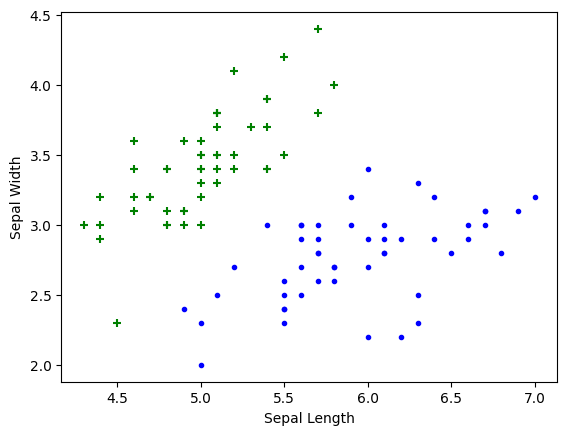

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#Sepal Length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

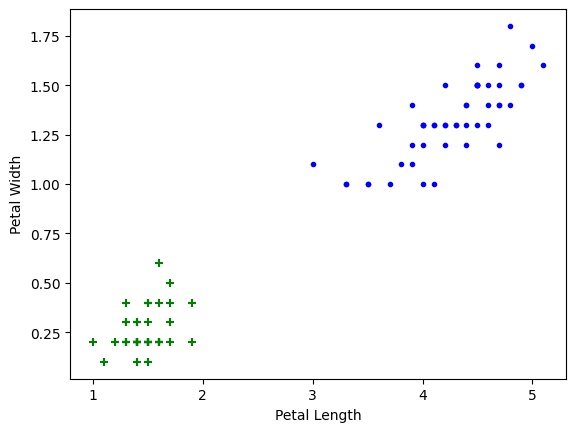

In [16]:
#Petal Length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.')

In [18]:
#Creating traning and testing dataframe
#Train test split

from sklearn.model_selection import train_test_split
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
len(X_train)

105

In [20]:
len(X_test)

45

In [24]:
#creating KNN ( K neearest neighbor Classifier)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)


In [26]:
knn.fit(X_train, y_train) # Learning and prediction

KNeighborsClassifier(n_neighbors=10)

In [27]:
knn.score(X_test, y_test) #check prediction/performance score

0.9777777777777777

In [28]:
#knn.predict([[4.8,3.0,1.5,0.3]]) #passing test values to predict the species
predicted_value = knn.predict([[6.5,2.8,4.6,1.5]]) #passing test values to predict the species

print('KNN Species Prediction:', predicted_value)

KNN Species Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

Text(95.72222222222221, 0.5, 'Truth')

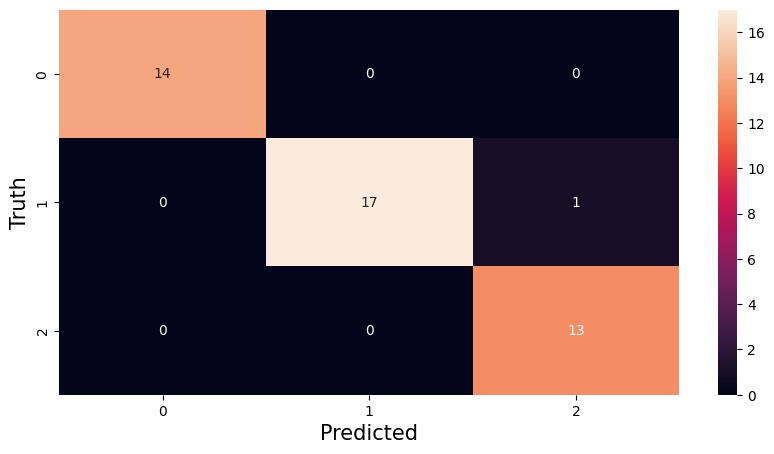

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)

In [35]:
#Generating classification report for precesion, recall and f1-score for each classes

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

